In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
!unzip Uber_dataset.zip

Archive:  Uber_dataset.zip
replace uber_travel_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: uber_travel_data.csv    y

replace __MACOSX/._uber_travel_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: __MACOSX/._uber_travel_data.csv  


In [30]:
!ls -lrt

total 525784
-rw-r--r-- 1 root root 520141836 May 12  2022 uber_travel_data.csv
drwxr-xr-x 1 root root      4096 Jul 29 13:22 sample_data
-rw-r--r-- 1 root root  18251707 Jul 31 14:50 Uber_dataset.zip
drwxr-xr-x 2 root root      4096 Jul 31 14:51 __MACOSX


In [31]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [32]:
df = pd.read_csv('uber_travel_data.csv')

In [33]:
df.shape

(4542026, 5)

In [34]:
df.head(10)

,sourceid,source,dstid,destination,travel_time
0,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",283
1,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",266
2,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",238
3,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",269
4,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",259
5,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",284
6,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",300
7,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",223
8,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",254
9,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",252


<Axes: >

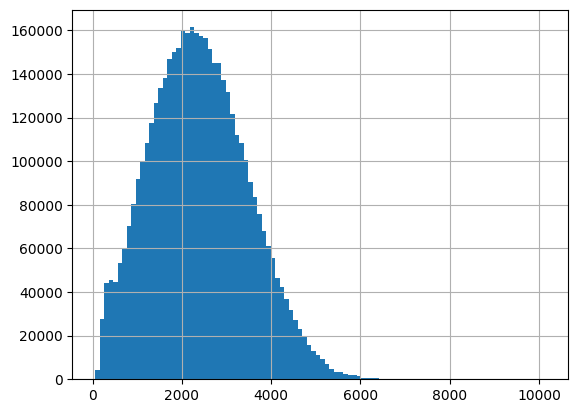

In [35]:
df["travel_time"].hist(bins = 100 )

The above distribution is not a gaussian distribution

In [36]:
df.columns

Index(['sourceid', 'source', 'dstid', 'destination', 'travel_time'], dtype='object')

In [ ]:
df.value_counts(["sourceid" , "dstid"]).sort_values()

<Axes: >

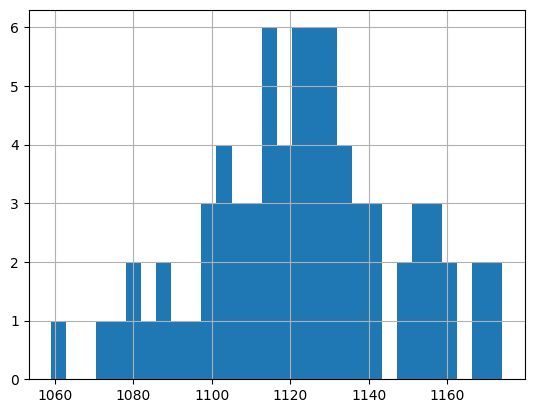

In [53]:
data1 = df[(df['sourceid'] == 1) & (df['dstid'] == 5)]['travel_time']
data1.hist(bins = 30)

In [54]:
data1.shape

(75,)

**Only 75 rows are there that means we don't have enough samples so here we use Bootstrap Sampling(Sampling with repetations to generate more datapoint) **

# CLT for C.I on mean Time Taken for delivery (Average)

In [55]:
#lets create r = 1000 bootstrap samples , and each bootstrap sample is of size lets say 50
#bs_means is a list that contains 1000 bootstrap sample means
bs_means = []
data1 = df[(df['sourceid'] == 1) & (df['dstid'] == 5)]['travel_time']
size = 50
for r in range(1000):
  bs_sample = data1.sample(size , replace = True) # sampling with replacement
  bs_mean = bs_sample.mean()
  bs_means.append(bs_mean)

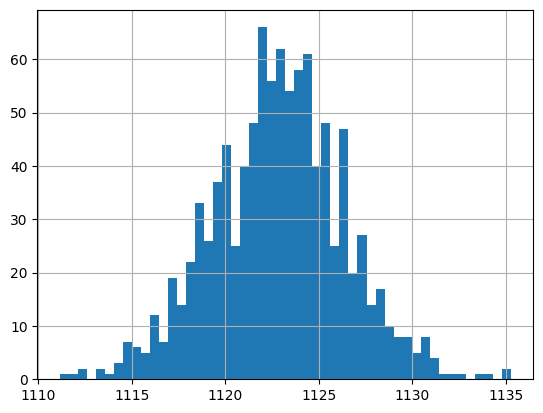

In [62]:
plt.figure()
plt.hist(bs_means , bins = 50)
plt.grid()
plt.show()

In [60]:
#Taking out population mean from the sample means as mean of the sample mean is the population mean

In [64]:
print(np.mean(bs_means))
print(np.std(bs_means)) #this is basically the standard error

1122.84616
3.5261020482113117


**Above we found out the mean of the population using CLT, now Finding Confidence interval below  **

In [69]:
#Finding 95% Confidence Interval using [Mean - 2(std) , Mean + 2(std)]
print(np.mean(bs_means) - 2*(np.std(bs_means)))
print(np.mean(bs_means) + 2*(np.std(bs_means)))

1115.7939559035774
1129.8983640964227


In [70]:
#Now Finding Confidence Interval using np.percentile
print(np.percentile(bs_means , [2.5 , 97.5]).round(2))


[1115.74 1129.88]


**Here we can see that both the results are almost same, hence we can use both the methods for finding the Confidence Interval but 1st method is for finding Confidence interval for mean only**

--- 2nd method is a more generalized method for finding confidence interval for any statiscals findings

--- what if r is 100 rather than 1000 ? the standard error would be high, mean would approximately be same as earlier










# 99% C.I on the 99th percentile value for travel time via bootstrapping

In [71]:
#what if we want C.I pon the 99th percentile ?
#Lets create a bootstrap sample of Size 10000 i.e r=10000 , and lets say the side of each sample is 75
#bs_99p is a list of "r" bootstrap sample's of 99th percentile
r = 10000
size = 75
bs_99p = []
for i in range(r):
  bs_sample = data1.sample(size , replace = True)
  bs_99p.append(np.percentile(bs_sample , 99)) # here we are calculating 99th percentile from each sample NOT the mean hence CLT is not valid here

In [72]:
len(bs_99p)

10000

--- Now Can we apply CLT on bs_99p ? NO, because here we are not calculating the sample mean here we are calculating the sample percentile, CLT is only valid for sample mean, it gives the sample mean a gaussian distribution

--- bs_99p may or may not be gaussian distribution

--- But still we can use bootstrap and can find 95% C.I on the 99th percentile using np.percentile







In [74]:
print(np.percentile(bs_99p , [2.5 , 97.5]).round(2)) #basically it is the 95% C.I of the 99th percentile delivery Time from loc1 to loc5

[1161.42 1174.  ]


In [75]:
#point estimate of 99th percentile of the 75 observed samples
np.percentile(data1 , 99)

1174.0

Above we can we that the actual 99th percentile value in my actual data(75) has 99th percentile as 1174 that means atleast 99%of the deliveries are done before 1174 seconds

---what could be the benefit of this calculations ?
Suppose UBER offers a scheme of free food if they aren't able to provide the delivery within a specified time, So what should be that specified time ? Now for that calculation we did all this stuff and we could say that the upper bound of the 99th percentile will be that specified time.



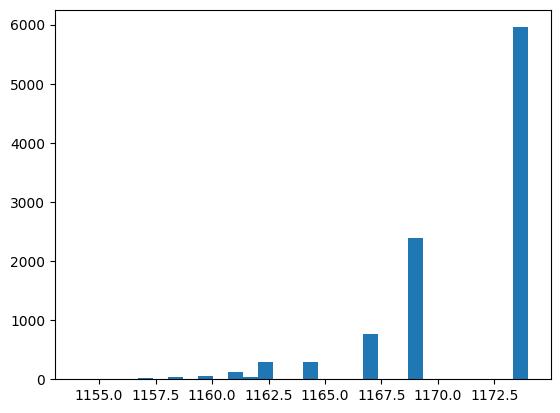

In [77]:
plt.hist(bs_99p , bins = 30)
plt.show()

--- As above we can clearly see that bs_99p does not follow gaussian distribution

--- CLT is only applicable for mean NOT for other percentiles



